# Predicting Stock Market With Machine Learning

In [122]:
import os
import pandas as pd
import numpy as np

dataset = dict()

for root, dirs, files in os.walk("Datasets"):
    for file in files:
        if file.endswith(".csv"):
            dataname = file.split('.')[0]
            dataset[dataname] = pd.read_csv(os.path.join(root, file))

dataset['AppleStock_Year1'].head()

,Date,Close,High,Low,Open,Volume,Target
0,2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700,182.910507
1,2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500,180.587524
2,2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600,179.862839
3,2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300,184.210999
4,2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500,183.794052


# Linear Regression Model

Using a linear regression model should be a good start to see how well it performs in predicting the next day stock. Though it sounds possible that this model might not work that well and be quite inaccurate because of how chaotic the stock market moves

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Using the first year of Apple stock data
features = dataset['AppleStock_Year1'][['Open', 'High', 'Low', 'Close', 'Volume']]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_lr, y_train_lr)

# Predict on test data
linear_regression_predictions = linear_regression_model.predict(x_test_lr)

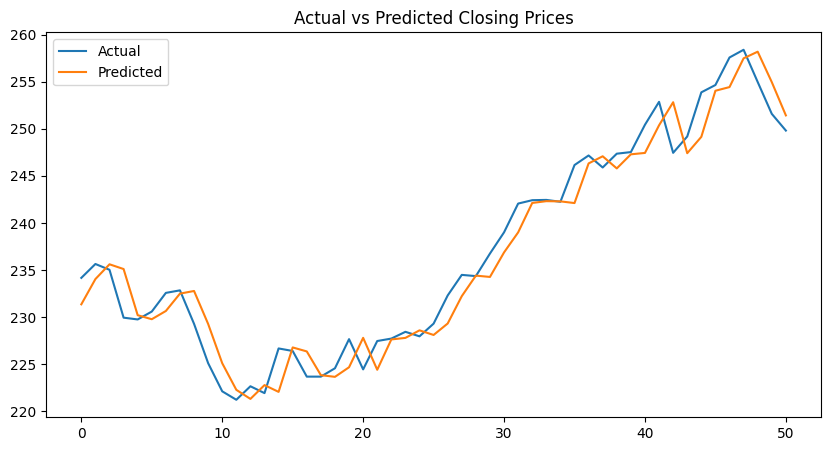

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_lr.values, label='Actual')
plt.plot(linear_regression_predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_lr, linear_regression_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, linear_regression_predictions)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Linear Regression Model Performance:
Mean Squared Error = 5.99
Root Mean Squared Error = 2.45
R2 Score = 0.95


After seeing how the model perform with the apple stock in 1 year time difference, it seems to be performing quite well than I anticipated with the R2 score of 0.95. Though we can't deny that it still miss a few predictions or really quite a few of the predictions through the plot and through the MSE calculation, but overall it went well over expectations

In [126]:
# Using the five year of Apple stock data
features = dataset['AppleStock_Year5'][['Open', 'High', 'Low', 'Close', 'Volume']]
stock_target = dataset['AppleStock_Year5']['Target']

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

linear_regression_model.fit(x_train_lr, y_train_lr)

# Predict on test data
linear_regression_predictions = linear_regression_model.predict(x_test_lr)

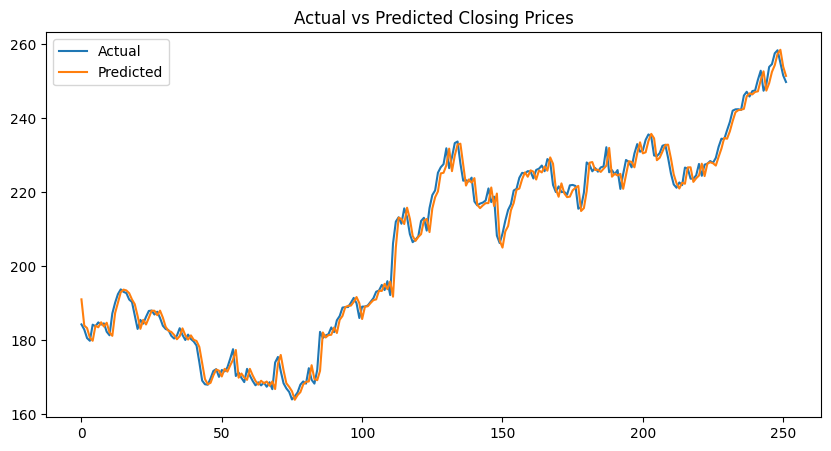

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_lr.values, label='Actual')
plt.plot(linear_regression_predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [128]:
mse = mean_squared_error(y_test_lr, linear_regression_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, linear_regression_predictions)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Linear Regression Model Performance:
Mean Squared Error = 8.63
Root Mean Squared Error = 2.94
R2 Score = 0.99


When using the apple stock with a 5 year difference the linear regression model gives quite the R2 score of 0.99. Although the MSE also did get bigger which is possibly due to the higher amount of data as well, the linear regression model overall did alright.